<div style="overflow: hidden; white-space: nowrap;">
        <a href="https://www.thinkdataworks.com/"><img src="https://media.licdn.com/dms/image/C560BAQEbnYuDICtxVQ/company-logo_200_200/0?e=2159024400&v=beta&t=9zwm0jvDMObA4EVjFB1ymCsqc8sdaphLJ9kt1duXbnc" width="5%" style="float:right;"/></a>
    <h2 style="color:#203448;">Price Transparency Investigation</h2>
    <p><i> Marie Erwood & Calum McGuicken</i></p>
</div>

In [ ]:
# Install Namara-python
%pip install --extra-index-url https://pypi.fury.io/thinkdataworks/ namara-python

In [ ]:
# TODO: change this to load a file from the user's local GDRIVE folder (so it's both personalised and secure)

# Load Namara API key from config file
# Requires a .env file in local folder with MCKINSEY_API_KEY value
from dotenv import load_dotenv
import os
load_dotenv()
NAMARA_API_KEY = os.getenv('MCKINSEY_API_KEY')

In [ ]:
# TODO: Link Google Drive to Notebook, specifically link a folder in the shared folder for this project

In [ ]:
from namara_python.client import Client

namara = Client(
    api_key=NAMARA_API_KEY,
    auth_url='https://account.mckinsey.namara.io', 
    api_url='https://api.mckinsey.namara.io'
)

To find out more about the Namara API and how to identify your credentials, [please see the API documentation](https://app.ee.namara.io/api_docs/#api-introduction "Namara API Docs").

## Get organization details

In [ ]:
# Get list of user available organizations
available_orgs = namara.list_organizations()  

# Get org id for 'Price Transparency'
organization_id = [org['id'] for org in available_orgs if org['title'] == 'Price Transparency'][0]
print(f"Price Transparency Org ID:{organization_id}")

Price Transparency Org ID:d79a4afe-bab6-4563-b665-496fc502b7ac


## Get list of all datasets in organization

In [ ]:
import pandas as pd

offset = 0
chunk = 1
datasets_list = []

# Iteratively call the API using offset to get an exhaustive list of dataset
while True:
    # Create list dict
    filter = {"limit": 200, "offset": offset}
    
    # List datasets within org. using filter
    datasets = namara.list_organization_datasets(organization_id=organization_id, filter=filter)
    
    # Stop if no results returned
    if len(datasets) == 0:
        print(f"Finished...")
        break
       

    print(f"Adding list of {len(datasets)} datasets within the org (chunk {chunk})...")
    if not datasets_list:
        datasets_list = datasets
    else:
        datasets_list = datasets_list + datasets
    
    offset += 200
    chunk += 1
    
print(f"Total number of datasets: {len(datasets_list)}")

Adding list of 200 datasets within the org (chunk 1)...
Adding list of 200 datasets within the org (chunk 2)...
Adding list of 200 datasets within the org (chunk 3)...
Adding list of 200 datasets within the org (chunk 4)...
Adding list of 200 datasets within the org (chunk 5)...
Adding list of 200 datasets within the org (chunk 6)...
Adding list of 200 datasets within the org (chunk 7)...
Adding list of 200 datasets within the org (chunk 8)...
Adding list of 200 datasets within the org (chunk 9)...
Adding list of 200 datasets within the org (chunk 10)...
Adding list of 40 datasets within the org (chunk 11)...
Finished...
Total number of datasets: 2040


In [ ]:
datasets_df = pd.DataFrame(datasets_list)
datasets_df.head()

,id,reference_id,source_id,organization_id,uploader_id,state,title,description,marked_for_destruction_at,imported_at,...,disposed_at,created_at,updated_at,versions,source_label,reference_state,reference_next_ingest,reference_imported_at,reference_failed_at,custom_fields
0,bb959191-08bb-4e9e-bec5-60a9c97cfde8,438418ea-5b3b-4cbd-8b2c-42c8a1f70319,8bb6112c-0ace-4894-ac19-08ebcb51946e,d79a4afe-bab6-4563-b665-496fc502b7ac,a2d26cb0-6a3a-428d-a4d8-2852c01907e0,imported,St. Mary's Medical Center Standard Charges,"enrichment:\n version: ""2""\n enrichments:\n ...","{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-20T16:09:51.076317Z'},...,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-20T16:00:04.140608Z'},{'timestamp': '2022-01-24T15:31:05.970509Z'},[{'id': 'a7690067-25e5-44dc-acdb-4ab184965528'...,CommonSpirit Health (HTTP),failed,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-20T16:09:51.097253Z'},{'timestamp': '2022-01-20T19:19:59.402132Z'},NaN
1,9ff29946-35d4-4c06-b4bd-25ae64c7039a,8a03a9f5-dc6a-44bf-9b8b-93c913e71a56,c8b34d46-5d37-40e1-bdca-fe400da3c8bb,d79a4afe-bab6-4563-b665-496fc502b7ac,7ac23e60-a041-4b63-a83b-954ccc957485,imported,Infirmary Health Mobile Infirmary Standard Cha...,NaN,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T21:11:50.136859Z'},...,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:50:21.449690Z'},{'timestamp': '2022-01-18T21:11:50.236908Z'},[{'id': 'c8a37506-19e6-4477-b118-7dc1f60dd8da'...,NaN,imported,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T21:11:50.220286Z'},"{'is_null': True, 'timestamp': '1970-01-01T00:...",NaN
2,cc27f6c4-b27b-495b-9253-0b1bca21eecf,2b6e068e-4cc1-484d-8bb6-2e9b12f19fa5,c8b34d46-5d37-40e1-bdca-fe400da3c8bb,d79a4afe-bab6-4563-b665-496fc502b7ac,7ac23e60-a041-4b63-a83b-954ccc957485,imported,Infirmary Health Mobile Infirmary Charge Master,NaN,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T21:00:36.515300Z'},...,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:49:56.785145Z'},{'timestamp': '2022-01-18T21:00:36.598026Z'},[{'id': 'a0989378-a87f-45cf-9b15-eaeeebb42564'...,NaN,imported,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T21:00:36.583166Z'},"{'is_null': True, 'timestamp': '1970-01-01T00:...",NaN
3,6bfdb124-9a31-419a-a6a1-4f9c2f95c208,ac6d46cd-5a72-47b1-b9de-6c11c2188e36,c8b34d46-5d37-40e1-bdca-fe400da3c8bb,d79a4afe-bab6-4563-b665-496fc502b7ac,7ac23e60-a041-4b63-a83b-954ccc957485,imported,Infirmary Health Long Term Acute Care Hospital...,NaN,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:57:53.063548Z'},...,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:46:40.631987Z'},{'timestamp': '2022-01-18T20:57:53.172619Z'},[{'id': '666ff04d-6933-4569-9f89-d7f9e8c6a4d2'...,NaN,imported,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:57:53.152408Z'},"{'is_null': True, 'timestamp': '1970-01-01T00:...",NaN
4,c549b8f4-bb9b-4489-8b3e-aad69304d024,b10ab58b-de2c-4bfa-804b-e9aebbb43538,c8b34d46-5d37-40e1-bdca-fe400da3c8bb,d79a4afe-bab6-4563-b665-496fc502b7ac,7ac23e60-a041-4b63-a83b-954ccc957485,imported,Infirmary Health Long Term Acute Care Hospital...,NaN,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:52:30.868437Z'},...,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:44:29.556893Z'},{'timestamp': '2022-01-18T20:52:30.958260Z'},[{'id': '38b2c4af-a753-486d-aa83-bbdc7c5c8162'...,NaN,imported,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:52:30.926940Z'},"{'is_null': True, 'timestamp': '1970-01-01T00:...",NaN


In [ ]:
# Save dataframe of org datasets for future reference
filename = "./org_datasets_20220209.csv"
print(f"Saving dataframe to {filename}...")
datasets_df.to_csv(filename, index=None)

Saving dataframe to ./org_datasets_20220209.csv...


## Get list of headers

In [ ]:
# Load CSV into dataframe
filename = "./org_datasets_20220209.csv"
print(f"Loading into dataframe {filename}...")
org_datasets_df = pd.read_csv(filename)

Loading into dataframe ./org_datasets_20220209.csv...


In [ ]:
# Get list of dataset ids in org
org_dataset_id_list = org_datasets_df["id"].to_list()

In [ ]:
def find_latest_rev_index(dataset):
    rev_tags = []
    for ds_ver in dataset['dataset']['versions']:
        for rev in ds_ver['revisions']:
            if 'tags' in rev:
                name = rev['tags'][0]['name']
                name = [name] if type(name) is str else name
                rev_tags.extend(name)
            else:
                rev_tags.extend(['NO_TAGS'])
    latest_rev = rev_tags.index('latest')
    #print(f'Latest revision index: {latest_rev}')
    return latest_rev

def get_latest_columns(dataset):
    latest_rev = find_latest_rev_index(dataset)
    column_titles = [column['title'] for column in dataset['dataset']['versions'][latest_rev]['properties']]
    return column_titles

In [ ]:
# Iterate over each dataset id, get column titles from metadata

# column_list = []
# for dataset_id in org_dataset_id_list:
#     # Get metadata for dataset
#     dataset = namara.get_dataset(id=dataset_id)
#     # Get metadata from the latest version
#     # column_titles = [column['title'] for column in dataset['dataset']['versions'][0]['properties']]
#     column_titles = get_latest_columns(dataset)
#     # Append list
#     column_list.append(column_titles)
    
column_list = []
for dataset_id in org_dataset_id_list:
    # Get metadata for dataset
    try:
        dataset = namara.get_dataset(id=dataset_id)
        # Get metadata from the latest version
        column_titles = get_latest_columns(dataset)
        # Append list
        column_list.append(column_titles)
    except Exception as err:
        print(f'Could not get dataset {dataset_id}: {err}. Skipping ...')
        column_list.append(["Unauthorized"]) 
        continue    

In [ ]:
# Add list of column titles per datasets to dataset dataframe
org_datasets_df['column_titles'] = column_list
org_datasets_df.head()

,id,reference_id,source_id,organization_id,uploader_id,state,title,description,marked_for_destruction_at,imported_at,...,created_at,updated_at,versions,source_label,reference_state,reference_next_ingest,reference_imported_at,reference_failed_at,custom_fields,column_titles
0,bb959191-08bb-4e9e-bec5-60a9c97cfde8,438418ea-5b3b-4cbd-8b2c-42c8a1f70319,8bb6112c-0ace-4894-ac19-08ebcb51946e,d79a4afe-bab6-4563-b665-496fc502b7ac,a2d26cb0-6a3a-428d-a4d8-2852c01907e0,imported,St. Mary's Medical Center Standard Charges,"enrichment:\n version: ""2""\n enrichments:\n ...","{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-20T16:09:51.076317Z'},...,{'timestamp': '2022-01-20T16:00:04.140608Z'},{'timestamp': '2022-01-24T15:31:05.970509Z'},[{'id': 'a7690067-25e5-44dc-acdb-4ab184965528'...,CommonSpirit Health (HTTP),failed,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-20T16:09:51.097253Z'},{'timestamp': '2022-01-20T19:19:59.402132Z'},NaN,"[Nm Id, Cdm Number, Billing Description 25 Cha..."
1,9ff29946-35d4-4c06-b4bd-25ae64c7039a,8a03a9f5-dc6a-44bf-9b8b-93c913e71a56,c8b34d46-5d37-40e1-bdca-fe400da3c8bb,d79a4afe-bab6-4563-b665-496fc502b7ac,7ac23e60-a041-4b63-a83b-954ccc957485,imported,Infirmary Health Mobile Infirmary Standard Cha...,NaN,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T21:11:50.136859Z'},...,{'timestamp': '2022-01-18T20:50:21.449690Z'},{'timestamp': '2022-01-18T21:11:50.236908Z'},[{'id': 'c8a37506-19e6-4477-b118-7dc1f60dd8da'...,NaN,imported,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T21:11:50.220286Z'},"{'is_null': True, 'timestamp': '1970-01-01T00:...",NaN,"[Nm Id, Procedure, Procedure Description, Paye..."
2,cc27f6c4-b27b-495b-9253-0b1bca21eecf,2b6e068e-4cc1-484d-8bb6-2e9b12f19fa5,c8b34d46-5d37-40e1-bdca-fe400da3c8bb,d79a4afe-bab6-4563-b665-496fc502b7ac,7ac23e60-a041-4b63-a83b-954ccc957485,imported,Infirmary Health Mobile Infirmary Charge Master,NaN,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T21:00:36.515300Z'},...,{'timestamp': '2022-01-18T20:49:56.785145Z'},{'timestamp': '2022-01-18T21:00:36.598026Z'},[{'id': 'a0989378-a87f-45cf-9b15-eaeeebb42564'...,NaN,imported,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T21:00:36.583166Z'},"{'is_null': True, 'timestamp': '1970-01-01T00:...",NaN,"[Nm Id, Procedure, Procedure Description, Gros..."
3,6bfdb124-9a31-419a-a6a1-4f9c2f95c208,ac6d46cd-5a72-47b1-b9de-6c11c2188e36,c8b34d46-5d37-40e1-bdca-fe400da3c8bb,d79a4afe-bab6-4563-b665-496fc502b7ac,7ac23e60-a041-4b63-a83b-954ccc957485,imported,Infirmary Health Long Term Acute Care Hospital...,NaN,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:57:53.063548Z'},...,{'timestamp': '2022-01-18T20:46:40.631987Z'},{'timestamp': '2022-01-18T20:57:53.172619Z'},[{'id': '666ff04d-6933-4569-9f89-d7f9e8c6a4d2'...,NaN,imported,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:57:53.152408Z'},"{'is_null': True, 'timestamp': '1970-01-01T00:...",NaN,"[Nm Id, Procedure, Procedure Description, Paye..."
4,c549b8f4-bb9b-4489-8b3e-aad69304d024,b10ab58b-de2c-4bfa-804b-e9aebbb43538,c8b34d46-5d37-40e1-bdca-fe400da3c8bb,d79a4afe-bab6-4563-b665-496fc502b7ac,7ac23e60-a041-4b63-a83b-954ccc957485,imported,Infirmary Health Long Term Acute Care Hospital...,NaN,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:52:30.868437Z'},...,{'timestamp': '2022-01-18T20:44:29.556893Z'},{'timestamp': '2022-01-18T20:52:30.958260Z'},[{'id': '38b2c4af-a753-486d-aa83-bbdc7c5c8162'...,NaN,imported,"{'is_null': True, 'timestamp': '1970-01-01T00:...",{'timestamp': '2022-01-18T20:52:30.926940Z'},"{'is_null': True, 'timestamp': '1970-01-01T00:...",NaN,"[Nm Id, Procedure, Procedure Description, Gros..."


In [ ]:
# Save dataframe of org datasets with list of column titles for future reference
filename = "./org_datasets_with_column_titles_090221.csv"
print(f"Saving dataframe to {filename}...")
org_datasets_df.to_csv(filename, index=None)

Saving dataframe to ./org_datasets_with_column_titles_090221.csv...


## Analysing column titles

In [ ]:
import pandas as pd

# Load CSV of org datasets with list of column titles
filename = "./org_datasets_with_column_titles_090221.csv"
print(f"Loading CSV {filename}...")
org_datasets_df = pd.read_csv(filename)

Loading CSV ./org_datasets_with_column_titles_090221.csv...


In [ ]:
# Combine all column titles into a list for analysis
from ast import literal_eval
column_string_list = org_datasets_df["column_titles"].to_list()
column_list = []
for item in column_string_list:
    column_list = column_list + literal_eval(item)

In [ ]:
column_list

['Nm Id',
 'Cdm Number',
 'Billing Description 25 Char',
 'Cpt',
 'R C',
 '999 Price Default',
 'Nm Id',
 'Procedure',
 'Procedure Description',
 'Payer',
 'Gross Charge',
 'Minimun Negotiated Ip Rate',
 'Maximum Negotiated Ip Rate',
 'Ip Cash Price',
 'Ip Expected Reimbursement',
 'Minimun Negotiated Op Rate',
 'Maximum Negotiated Op Rate',
 'Op Cash Price',
 'Op Expected Reimbursement',
 'Static Last Updated',
 'Static Source Url',
 'Static State',
 'Static Location',
 'Static Hospital',
 'Static Provider',
 'Static MSA',
 'Nm Id',
 'Procedure',
 'Procedure Description',
 'Gross Charge',
 'Static Last Updated',
 'Static Source Url',
 'Static State',
 'Static Location',
 'Static Hospital',
 'Static Provider',
 'Static MSA',
 'Nm Id',
 'Procedure',
 'Procedure Description',
 'Payer',
 'Gross Charge',
 'Minimun Negotiated Ip Rate',
 'Maximum Negotiated Ip Rate',
 'Ip Cash Price',
 'Ip Expected Reimbursement',
 'Minimun Negotiated Op Rate',
 'Maximum Negotiated Op Rate',
 'Op Cash Price'

In [ ]:
# Remove columns that are either added automatically with Namara or through enrichment by the data team
import re
regex = re.compile(r'^(Static )|^(Nm Id)$')
filtered_column_list = [column for column in column_list if not regex.match(column)]

In [ ]:
# Get unique columns
unique_columns = list(set(filtered_column_list))
print(f"Number of unique columns:{len(unique_columns)}")

Number of unique columns:17001


## Column Counts

In [ ]:
# Get count of each unique column
unique_column_count = [filtered_column_list.count(column) for column in unique_columns]

In [ ]:
# Create dataframe combining count and unique columns
column_df = pd.DataFrame({'column_title':unique_columns,'column_title_count':unique_column_count})

In [ ]:
# Save dataframe of column titles and counts
filename = "./org_column_titles_counts.csv"
print(f"Saving dataframe to {filename}...")
column_df.to_csv(filename, index=None)

Saving dataframe to ./org_column_titles_counts.csv...


In [ ]:
# Display top 20 by occurence
column_df.sort_values(by=['column_title_count'], ascending=False).head(20)

,column_title,column_title_count
6676,Description,823
13404,Gross Charge,713
11555,Discounted Cash Price,327
11715,Code Type,323
4215,Code,322
15130,Revenue Code,310
6043,Procedure Description,245
16768,Ndc,227
2949,Cpt,224
12981,Cigna,191


In [ ]:
# Display top 20 by occurence, ignoring "Unititled" columns
column_df[~column_df['column_title'].str.contains("Untitled")].sort_values(by=['column_title_count'], ascending=False).head(20)

,column_title,column_title_count
6676,Description,823
13404,Gross Charge,713
11555,Discounted Cash Price,327
11715,Code Type,323
4215,Code,322
15130,Revenue Code,310
6043,Procedure Description,245
16768,Ndc,227
2949,Cpt,224
12981,Cigna,191


_TODO: Improve this by creating 'aliases' for each column, for example "Line of business": "Business Area", "Business Category" etc._

## Similar columns to McK suggestions

In [ ]:
mck_columns = ['Year of data',
'Date of data',
'Effective year',
'Effective date',
'Health system name',
'Facility name',
'Facility state',
'Facility city',
'Facility address',
'Facility zip code',
'Facility MSA code',
'Facility MSA name',
'Data type',
'Line of business',
'Payor name',
'Product name',
'Service type',
'Procedure code type',
'Procedure code',
'Procedure code description',
'Procedure relative weight',
'Gross charge',
'Negotiated rate',
'Max rate',
'Min rate',
'Mean rate',
'Median rate',
'Notes/Ancillary fields',
'Data updated date',
'Source data']

In [ ]:
# Using SequenceMatcher to look at similarity between columns, part of difflib library: https://docs.python.org/3.9/library/difflib.html
import difflib

# Threshold for identifying if similar (as fraction)
similarity_threshold = 0.85

# Create empty dict for storing matches
mck_similar = {}

# Create summary list
mck_total_similar = []

# Create counter var for similar column count
similar_column_count = 0

# Iterate over each McK column and generate list of similar columns from our unique column list (if they exist)
for mck_column in mck_columns:
    similar_columns = [column for column in unique_columns if difflib.SequenceMatcher(None,column,mck_column).ratio() >= similarity_threshold]
    mck_similar[mck_column] = similar_columns
    mck_total_similar = mck_total_similar + similar_columns
    similar_column_count += len(similar_columns)
    print(f"{mck_column}:{similar_columns}\n")

Year of data:[]

Date of data:[]

Effective year:[]

Effective date:['Effective Date']

Health system name:[]

Facility name:['Facility Name', 'Facilityname']

Facility state:[]

Facility city:[]

Facility address:[]

Facility zip code:[]

Facility MSA code:[]

Facility MSA name:[]

Data type:[]

Line of business:[]

Payor name:[]

Product name:['Product Name']

Service type:['Service Type', 'Servce Type']

Procedure code type:[]

Procedure code:['Procedure Code', 'Procedurecode']

Procedure code description:['Procedure Cdm Description', 'Procedure Description', 'Proceduredescription']

Procedure relative weight:[]

Gross charge:['Gross Charges', 'Grosscharge', 'Gross Charge']

Negotiated rate:['Negotiated Rates', 'Negotiated Rate']

Max rate:['Max Rate']

Min rate:['Min Rate']

Mean rate:[]

Median rate:[]

Notes/Ancillary fields:[]

Data updated date:[]

Source data:[]



In [ ]:
# Generate output of findings
unique_similar_columns = len(list(set(mck_total_similar)))
missing_columns = len([item for item in mck_similar if len(mck_similar[item]) == 0])
non_missing_columns = len(mck_columns) - missing_columns
similar_column_ratio = unique_similar_columns/len(unique_columns)
print(f"Total McK columns:{len(mck_columns)}. Columns in McK schema that have matches: {non_missing_columns}. Columns in McK schema that don't have matches: {missing_columns}. Unique columns matched in schema: {unique_similar_columns}/{len(unique_columns)} ({similar_column_ratio})")


Total McK columns:30. Columns in McK schema that have matches: 10. Columns in McK schema that don't have matches: 20. Unique columns matched in schema: 18/17001 (0.0010587612493382743)


## Analysing column frequencies

In [ ]:
import pandas as pd
from ast import literal_eval
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load CSV of org datasets with list of column titles
# filename = "./org_datasets_with_column_titles_040221.csv"
# print(f"Loading CSV {filename}...")
# org_datasets_df = pd.read_csv(filename)

In [ ]:
# convert column_titles to list
org_datasets_df['column_titles'] = org_datasets_df.column_titles.apply(literal_eval)


In [ ]:
# select only required columns and drop rows without a source label (drop is temporary until bug fixed)
dataset_cols = org_datasets_df[['title', 'source_label', 'column_titles']]
dataset_cols = dataset_cols[dataset_cols['source_label'].notnull()]


In [ ]:
# remove Namara ID column and enriched columns from column list
regex = re.compile(r'^(Static )|^(Nm Id)$')
dataset_cols['column_titles'] = [[i for i in j if not regex.match(i)] for j in dataset_cols['column_titles']]

In [ ]:
dataset_cols.head()

,title,source_label,column_titles
0,St. Mary's Medical Center Standard Charges,CommonSpirit Health (HTTP),"[Cdm Number, Billing Description 25 Char, Cpt,..."
7,Indiana University Health West hospital Standa...,Indiana University Health,"[Hospital, Service Code, Revenue Code, Ndc, Mo..."
8,Indiana University Health Tipton Hospital Stan...,Indiana University Health,"[Hospital, Service Code, Revenue Code, Ndc, Mo..."
9,Hancock Regional Hospital - Greenfield - Avera...,Hancock Regional Hospital,"[Diagnosis Related Group Code, Diagnosis Relat..."
10,Indiana University Health Paoli Hospital Stand...,Indiana University Health,"[Hospital, Service Code, Revenue Code, Ndc, Mo..."


In [ ]:
# create a string of column names and get counts of unique strings

dataset_cols['column_titles_str'] = dataset_cols['column_titles'].apply(', '.join)

value_counts_str = dataset_cols['column_titles_str'].value_counts()
val_counts_str = pd.DataFrame(value_counts_str).reset_index()
val_counts_str.columns = ['unique_column_combinations', 'total_occurrences']

# (can also do with sets, this results in 781 rows instead of 790 so not much difference)
# dataset_cols['column_titles_set'] = dataset_cols['column_titles'].apply(set)
# value_counts_set = dataset_cols['column_titles_set'].value_counts()
# val_counts_set = pd.DataFrame(value_counts_set).reset_index()
# val_counts_set.columns = ['unique_column_combinations', 'total_occurrences']

In [ ]:
val_counts_str

,unique_column_combinations,total_occurrences
0,"Procedure Id, Hcpcs Cpt Code, Description, Gro...",138
1,"Cdm Number, Code Description, Cpt Code, Revenu...",53
2,"Charge Px Code, Description, Cpt Hcpcs Code, G...",37
3,"Drg, Day, Plan Daily Rate",35
4,"Cpt Code, Modifier, Description, Plan Rate",33
...,...,...
839,"Procedure Code, Procedure Description, Price T...",1
840,"Cc, Ccdesc, Charge Code, Chrgcodedesc, Corp Id...",1
841,"Code, Description, Avg Charge 837, Min Allowab...",1
842,"Code, Code Description, Code Type, Revenue Cod...",1


In [ ]:
# Save dataframe of column_combinations and counts
filename = "./unique_column_combination_counts.csv"
print(f"Saving dataframe to {filename}...")
val_counts_str.to_csv(filename, index=None)

Saving dataframe to ./unique_column_combination_counts.csv...


In [ ]:
# create a count of columns and a grouped count of columns
dataset_cols['n_cols'] = [len(i) for i in dataset_cols['column_titles']]

dataset_cols['n_columns_binned'] = np.where(
    dataset_cols['n_cols'] <= 5, "0-5", np.where(
    dataset_cols['n_cols'] <= 15, "6-15", np.where(
    dataset_cols['n_cols'] <= 20, "16-20", "21+"
            )
        )
    )

In [ ]:
# check value counts
dataset_cols['n_columns_binned'].value_counts()

0-5      668
21+      602
6-15     501
16-20     80
Name: n_columns_binned, dtype: int64

<AxesSubplot:xlabel='n_cols', ylabel='Count'>

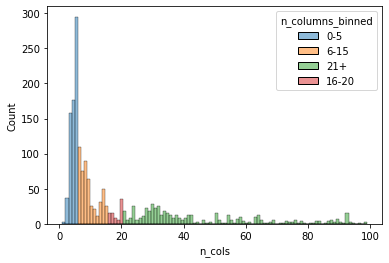

In [ ]:
# Plot to visualise column counts (filtering to exclude rows with > 100 columns as they are few and skew too much)

sns.histplot(data=dataset_cols[dataset_cols['n_cols']<100], x="n_cols", hue="n_columns_binned", bins = 100)

## Clustering

In [ ]:
# PoC clustering method using affinity propagation (chosen as unsupervised and self-determines number of clusters as an input)
import numpy as np
from sklearn.cluster import AffinityPropagation
import distance

# Test on a slice of the list for testing - doesn't converge / work with higher numbers so would need more data prep beforehand
selected_list = unique_columns[1:100]

# Required for indexing
columns = np.asarray(selected_list)

# Need to calc Levenshtein similarity ratio: https://www.datacamp.com/community/tutorials/fuzzy-string-python for the model
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in columns] for w2 in columns])

# Instanciate class - left damping as default (as suggested in original paper)
affprop = AffinityPropagation(random_state=5)

# Fit model
affprop.fit(lev_similarity)

print(f"Number of affprop labels:{len(np.unique(affprop.labels_))}, Number of cluster center indices:{len(affprop.cluster_centers_indices_)}")

# Iterate over clusters and print output of model
for cluster_id in np.unique(affprop.labels_):
    exemplar = columns[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(columns[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    print(f"{exemplar}: {cluster_str}\n")

Number of affprop labels:13, Number of cluster center indices:13
Derived Contracted Rate Cigna Health And Life Insurance Company Open Access Plus In Network: Derived Contracted Rate Cigna Health And Life Insurance Company Open Access Plus In Network

America S Ppo Inpatient: Aetna Better Health Pa, Aetna T92 F Aetna 1025, America S Ppo Inpatient, Bcbs Fmolhs Employee Group, Blue Cross Networks P S, Blue Shield Uc Care Members, Chs Prairie States Stm 400103, Cigna H42 Cigna Hmo H42 340, Dom Mclaren Health Op Rate, Health Partners Outpatient, Hennepin Health Outpatient, Magellan Behavioral Health, Nchewcf Min Allowable, Nmhc Healthpartners Federal, Price Effective Date, Wyandotte Tribe Of Oklahoma

United Healthcare Insurance Company Uhc Medicare Advantage Plan 1 Avg Allowable: Hphc Insurance Company A Subsidiary Of Harvard Pilgrim Healt Choyc Avg Allowable 2, United Healthcare Insurance Company Illinois Department Of Cms Max Allowable, United Healthcare Insurance Company Sweet Home Cent